# Exploratory Data Analysis - Real Estate Crime Statistics 


## Executive Summary

This project presents an exploratory analysis (EDA) of crime statistics across four regions in the United Kingdom, with a specific focus on understanding how patterns of criminial activity influence real estate desirabiity, property value stability and investor confidence.

This project aims to provide data driven insights into regional crime variations and to interpret these findings in the context of real estate decision-making.

The dataset used for this analysis was derived from official UK Police open data sources, containing detailed information on over 360,000 recorded crimes. The data underwent extensive preprocessing to ensure consistency, accuracy and usability. 

Key cleaning steps included:

- The removal of redundant variables such as context and lsoa_code to reduce noise and improve model efficiency.

- Standardisation of column names for readability and interoperability.

- Conversion of date fields into Year and Month Number to support time-series analysis.

- Verification of geospatial coordinates (latitude and longitude) to enable spatial visualisations.

Following this, the clean dataset provided a reliable foundation for detailed analytical exploration using Python’s data science libraries — Pandas, NumPy, Matplotlib, Seaborn and Folium.

### National Overview

The initial phase of the analysis explored overall crime patterns across the UK to identify high-level trends. The national overview revealed that Violence and Sexual Offences and Anti-Social Behaviour were the most dominant crime types across all regions, representing a significant portion of total reported incidents.

Temporal analysis revealed a distinct seasonal pattern in crime activity. Crime rates tended to increase between May and August, corresponding with warmer weather, longer daylight hours, and higher social activity levels. Rates declined during winter months, suggesting that external and environmental factors play a key role in influencing crime frequency.

A correlation heatmap was then applied to examine relationships between continuous variables such as longitude, latitude, year and month number. The results indicated low correlation coefficients, suggesting that these numerical fields alone are weak predictors of crime frequency. Instead, categorical variables such as region and crime type were found to have a much stronger explanatory power in understanding spatial and behavioural crime dynamics.

### Regional Case Study: Gwent vs Dorset

For deeper insight and regional comparison, two distinct police forces, Gwent and Dorset, were selected. These two regions were purposefully chosen to represent contrasting geographic, demographic and economic profiles. 

Gwent Police serves a predominantly semi-urban and rural area characterised by moderate income levels, affordable housing and steady population growth.

Dorset Police covers a coastal and urban region including Bournemouth and Poole, known for its tourism-driven economy, high property values and dense urban centres.

By comparing these two forces, the study aimed to contrast a low-cost, steady real estate market with a high-value, high-activity coastal market to evaluate how different socioeconomic environments shape crime exposure and real estate attractiveness.

## Introduction

This exploratory data analysis investigates crime data from four UK police forces to identify patterns and trends that could impact real estate desirability and investment decisions. 

The dataset was obtained from the UK Police Data, it consists of over 370,000 records. Each record represents a reported incident including the type of crime, police force and location of the crime.

Data Cleaning Involved:

-	Merging the CSV files across the four police forces

-	Renaming and standardising columns 

-	Removing irrelevant fields

-	Handling missing coordinates

-	Create year and month_num columns for trend analysis

The four regions that is being investigated in this analysis is Dorset, Gwent, Dyfed-Powys and City of London Police forces.


## Data Overview

The cleaned dataset contains fields such as:

- crime_type - category of offence
- reported_by - police force
- latitude / longitutde - for map plotting
- year / month_num - For time series trends

This structure allows analysis of how crime patterns vary by region, time and location. These are key factors for determining safe and desrible property areas.

In [5]:
# Import and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

plt.style.use('ggplot')

project_root = Path().resolve()
dataset_name = "cleaned_crime_data.csv"
data_path = project_root / dataset_name

if not data_path.exists():
    print("File not found in current folder. Searching project directories.")
    found_files = list(project_root.glob(f"**/{dataset_name}"))
    if found_files:
        data_path = found_files[0]
        print(f"Found file at: {data_path}")
    else:
        print("Could not find cleaned_crime_data.csv. Please ensure it’s in your project folder.")
try:
    crime_df = pd.read_csv(data_path)
    print(f"\n Cleaned dataset loaded successfully! Shape: {crime_df.shape}")
    print("\n Columns available:")
    print(list(crime_df.columns))
except Exception as e:
    print("Error loading dataset:", e)



File not found in current folder. Searching project directories...
Found file at: /Users/amirkalam/Desktop/CrimeStats/cleaned_crime_data.csv

 Cleaned dataset loaded successfully! Shape: (362043, 11)

 Columns available:
['crime_id', 'month', 'reported_by', 'longitude', 'latitude', 'location', 'lsoa_name', 'crime_type', 'last_outcome_category', 'year', 'month_num']


In [23]:
# Police Forces
force_counts = crime_df['reported_by'].value_counts()
force_counts

reported_by
Gwent Police             144876
Dorset Police            125048
Dyfed-Powys Police        75407
City of London Police     16712
Name: count, dtype: int64

In [24]:
crime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362043 entries, 0 to 362042
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   crime_id               362043 non-null  object 
 1   month                  362043 non-null  object 
 2   reported_by            362043 non-null  object 
 3   longitude              362043 non-null  float64
 4   latitude               362043 non-null  float64
 5   location               362043 non-null  object 
 6   lsoa_name              362043 non-null  object 
 7   crime_type             362043 non-null  object 
 8   last_outcome_category  362043 non-null  object 
 9   year                   362043 non-null  int64  
 10  month_num              362043 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 30.4+ MB


## Univariate Analysis - Crime Type Distribution

Understanding the most common crime categories helps to provide an insight into the safety risks most likley to affect local communities.

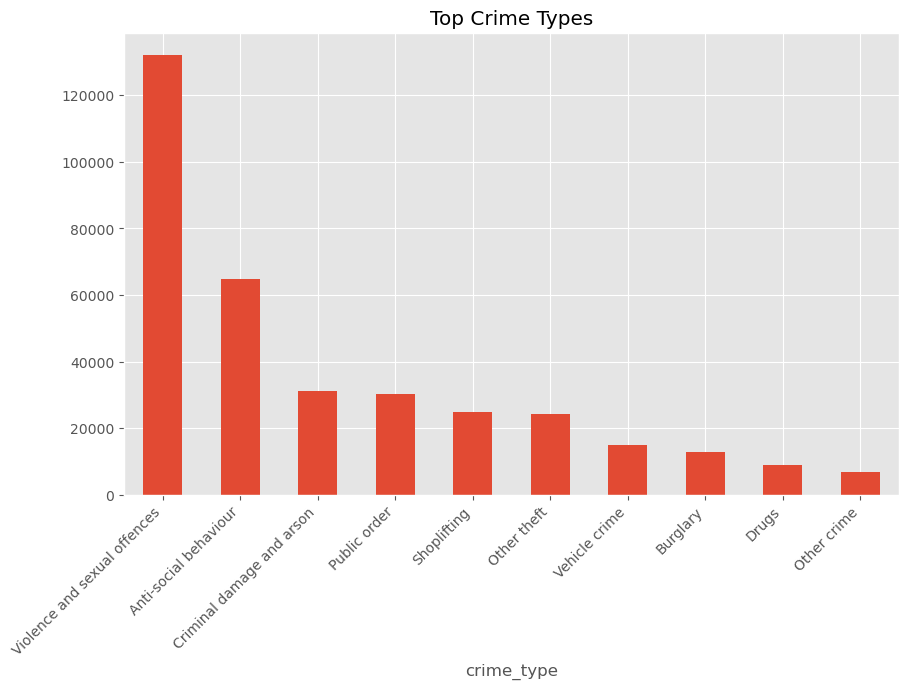

In [12]:
crime_df['crime_type'].value_counts().head(10).plot(kind='bar', figsize=(10,6))
plt.title("Top Crime Types")
plt.xticks(rotation=45, ha='right')
plt.show()


### Insight

According to this bar graph, Violence and Sexual offences was recorded as the highest type of crime across the four regions. The second highest was Anti-Social behavious which plays a big factor in choosing somewhere you would want to make a home.

## Univariate Analysis - Crimes by Police Force

Different police forces correspond to distinct geographic areas, making this a great measure of regional safety

<Axes: xlabel='reported_by'>

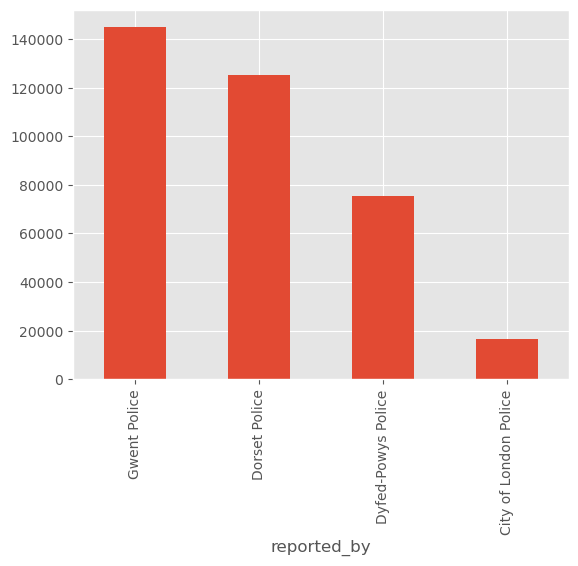

In [13]:
crime_df['reported_by'].value_counts().plot(kind='bar')


### Insight

According to the bar graph, forces in Gwent and Dorset recorded the highest level of crimes in their region. Forces in Dyfed-Poweys and City of London recorded the lowest crime rate in their region. This shows that Gwent Police is unlikley to be a location suitable to create a home.

## Bivariate Analysis - Crime Type by Region

By investigating the crime type by the region, it will help to identify which types of crime are common in these specific areas.

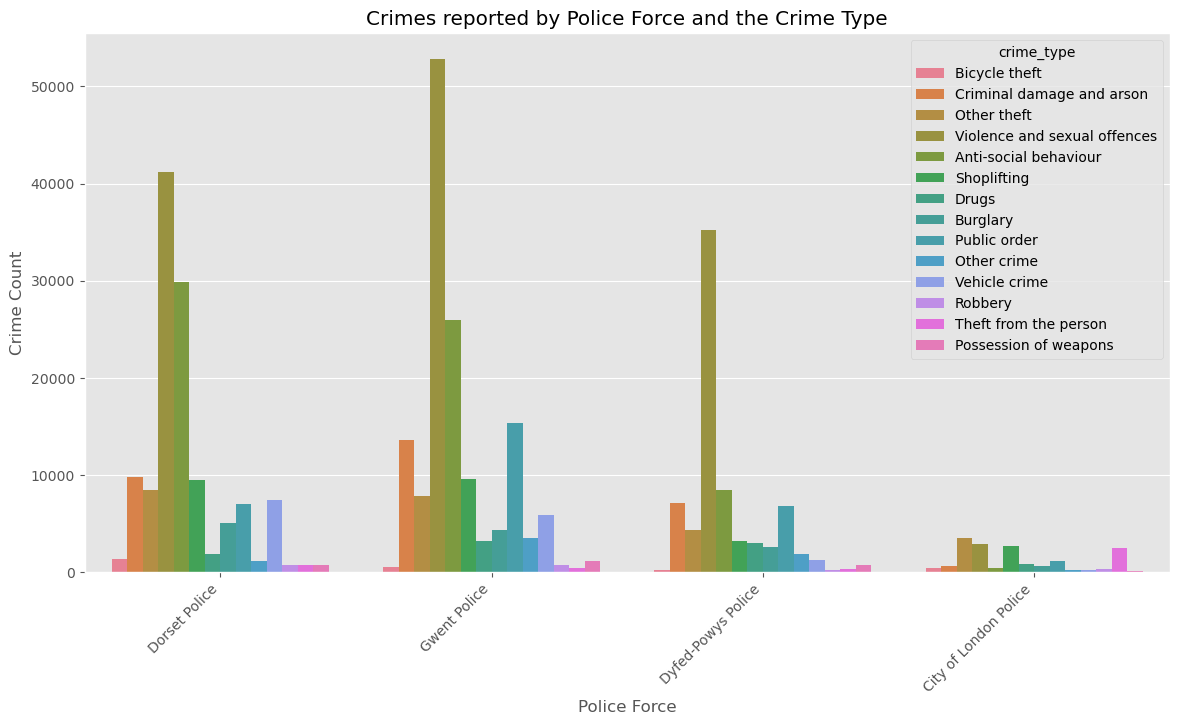

In [15]:
plt.figure(figsize=(14,7))
sns.countplot(data=crime_df, x='reported_by', hue='crime_type')
plt.xticks(rotation=45, ha='right')
plt.title("Crimes reported by Police Force and the Crime Type")
plt.xlabel("Police Force")
plt.ylabel("Crime Count")
plt.show()

## Insight

Across all Dorset, Gwent and Dyfed-Poweys regions, the highest level of recorded crime was Violence and Sexual Offences. Across all four regions the lowest level of recorded crime was possession of weapons. This information can guide the Real Estate Stakeholders in planning and identifying regions with lower level of exposure to severe crime types.

## Time Series Analysis - Monthly Trends 

Seasonal patterns in crime affect short term safety perception and can influence the timing of property purchases

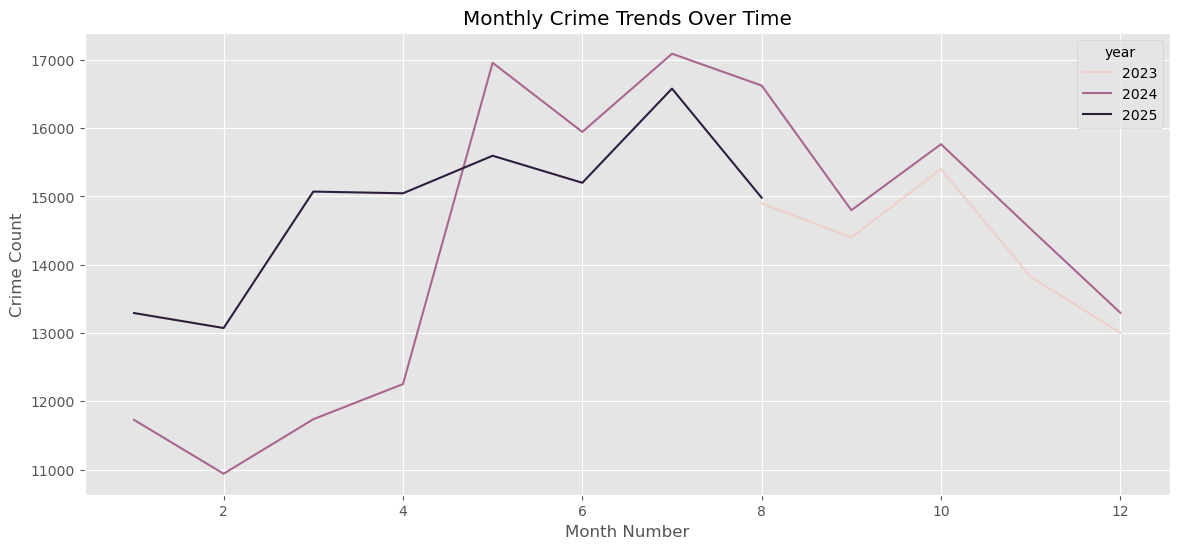

In [17]:
monthly_trends = crime_df.groupby(['year', 'month_num']).size().reset_index(name='counts')

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trends, x='month_num', y='counts', hue='year')
plt.title("Monthly Crime Trends Over Time")
plt.xlabel("Month Number")
plt.ylabel("Crime Count")
plt.show()


## Insight

According to this line graph, across all four regions crime increases the most in July. To understand why this is, a possibility could be due to the number of tourism or seasonal population change.

## Geographical Crime Distribution

Geospatial mapping provides a visual of where crimes occur. This is cruicial for location based investement analysis.

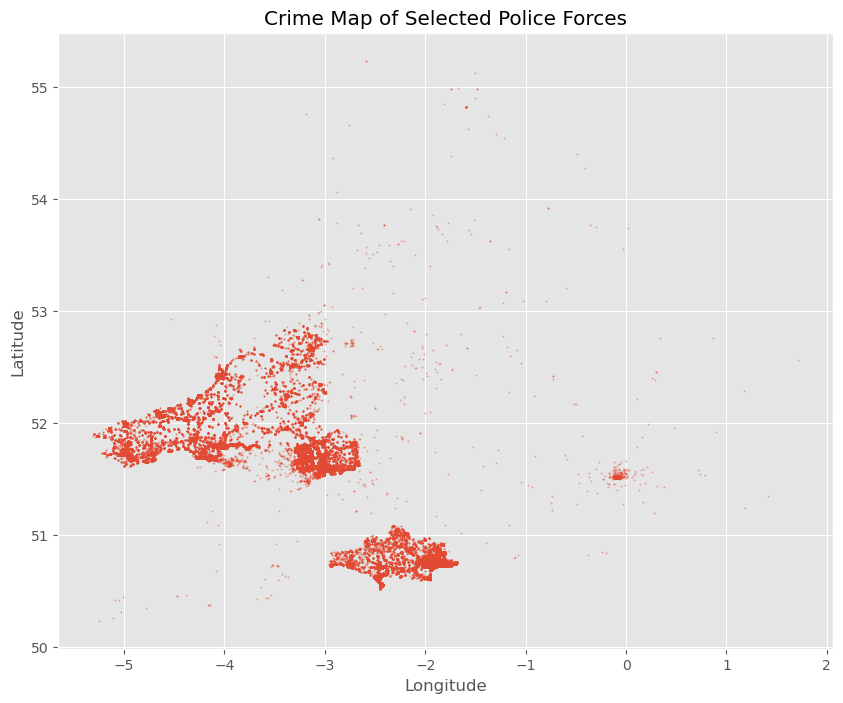

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(crime_df['longitude'], crime_df['latitude'], s=1, alpha=0.3)
plt.title("Crime Map of Selected Police Forces")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Insight

Crimes cluster densly in urban centers like Dorset, Gwent and Dyfed-Powys. Whereas in the city of London, the crime is not as clustered together. 

## Geographic Hotspot Mapping

Interactive maps created with folium help to provide a deeper spatial understanding, revealing exact hotspots for criminal activity.

In [25]:
import folium
from folium.plugins import HeatMap

# Prepare data
heat_df = crime_df[['latitude', 'longitude']].dropna()
heat_data = heat_df.values.tolist()

# Create the base map centred on the UK
m = folium.Map(location=[54.5, -3], zoom_start=6)

# Add the heatmap layer
HeatMap(heat_data,
        radius=7,
        blur=5,
        max_zoom=10).add_to(m)

# Display the map
m

## Insight

Across the four regions, the crime map shows hotspots where wales is densly populated with clusters. As an assumption, there is a lot of hotspots outside of the four regions we are looking in to. This is due to the fact that residents who reside in the four regions may have been prosecuted and charged outside of their home town.

## Correlation Heatmap

A correlational heatmap using Seaborn was generated to examine relationships between numeric features

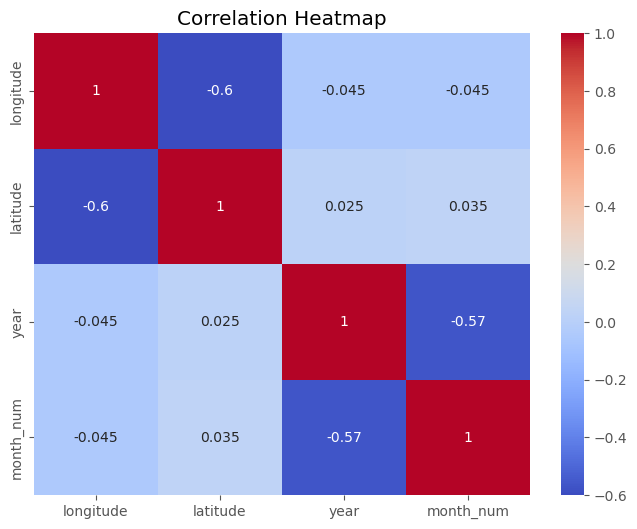

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(crime_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Insight 

The correlation heatmap highlights the relationship between numerical features in the dataset. There is a strong negative correlation (-0.6) between longitutude and latitude, which indicates that as one geographic coordinate increases, the other on decreases. 

The weak correlations which are closer to 0 between the time based variables and location variables, suggest that crime patterns are not directly dependent on specific coordinates or months when viewed numerically.

For our real estate stakeholders, this indiciated that location-based crime risks cannot be determined by simple numeric relationships, instead is is better to be analysed through spatial mapping between regions to accurately identify high-risk vs low-risk investment areas.

## Regional Comparison between two police forces

Two regions were selected to have a deeper, in-depth comparison of crime.

Gwent police - a semi-urband and rurual area covering towns such as Newport and Cwmbran
Dorset police - a coatal regional including bournemouth and poole, popular for tourism and student population.

Comparison for Gwent and Dorset was chosen because it provides a balanced view of urban-rural differences in crim and how they can affect real estate investors. 

In [26]:
# Two Police Forces

force_a = "Gwent Police"
force_b = "Dorset Police"

df_two_forces = crime_df[
    crime_df['reported_by'].isin([force_a, force_b])
]

df_two_forces.head()

crime_id       month  \
0  565aa860dd283becc57015bb54613e994ed5c3c75291d5...  2024-09-01   
1  97d4a32dc95f22650b6bb8931486e50586f45977e7544d...  2024-09-01   
2  38bfa57d8ac63181b2289e2fa32e8daead4bdaab847fd0...  2024-09-01   
3  6f86949323ba83df46fb224737e8ff7a89ccc9b5705e03...  2024-09-01   
4  7a003845a1f9be3bc1e6c150730797ce52dca2ea5f2d0e...  2024-09-01   

     reported_by  longitude   latitude                         location  \
0  Dorset Police  -1.953557  50.789750  On or near Theatre/Concert Hall   
1  Dorset Police  -1.931359  50.777086         On or near Knighton Lane   
2  Dorset Police  -1.946730  50.779999        On or near Moortown Drive   
3  Dorset Police  -1.957650  50.781802      On or near Queen Anne Drive   
4  Dorset Police  -1.946730  50.779999        On or near Moortown Drive   

                                  lsoa_name                    crime_type  \
0  Bournemouth, Christchurch and Poole 001A                 Bicycle theft   
1  Bournemouth, Christchurch and Poole 001A     Criminal damage and arson   
2  Bournemouth, Christchurch and Poole 001A                   Other theft   
3  Bournemouth, Christchurch and Poole 001A                   Other theft   
4  Bournemouth, Christchurch and Poole 001A  Violence and sexual offences   

                           last_outcome_category  year  month_num  
0  Investigation complete; no suspect identified  2024          9  
1  Investigation complete; no suspect identified  2024          9  
2  Investigation complete; no suspect identified  2024          9  
3    Formal action is not in the public interest  2024          9  
4                    Unable to prosecute suspect  2024          9

## Crime Type Comparison

A bar chart was created to help compare the distribution of crime types across the two regions

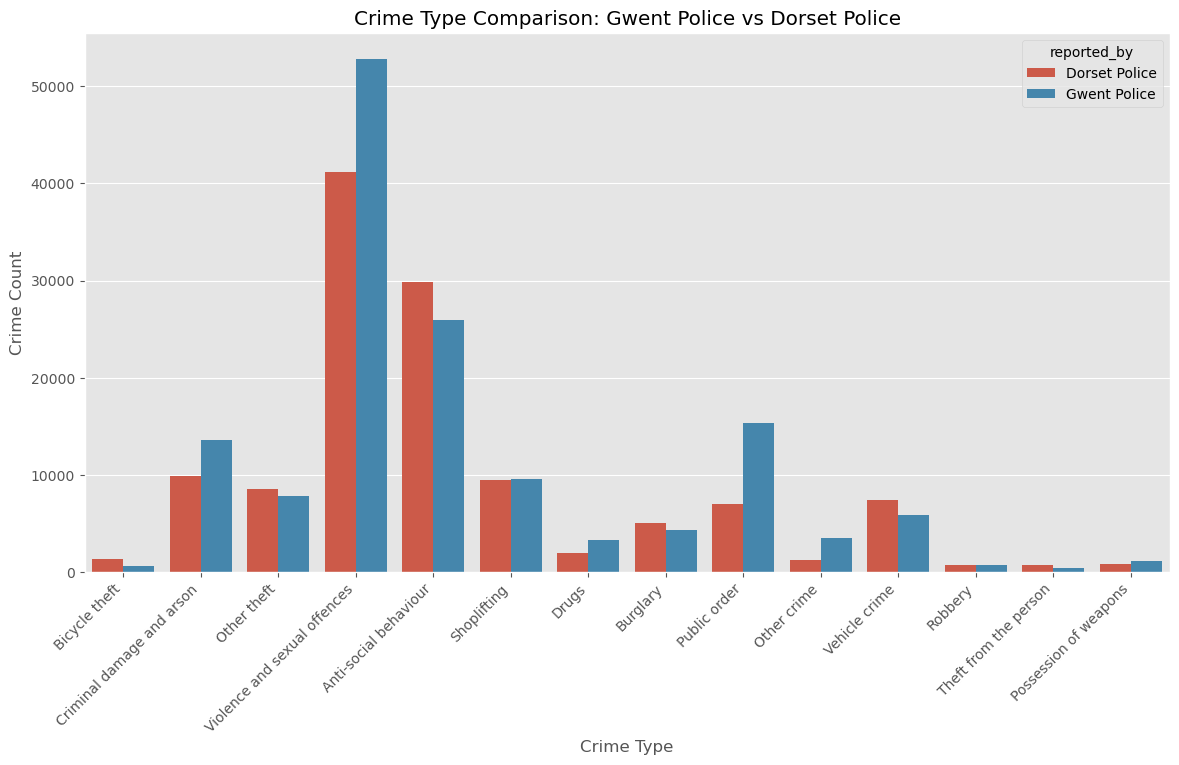

In [27]:
plt.figure(figsize=(14,7))
sns.countplot(data=df_two_forces, x='crime_type', hue='reported_by')
plt.title(f"Crime Type Comparison: {force_a} vs {force_b}")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.show()

## Insight

Across both regions, the two highest level of crime type comitted was Violence and Sexual offences and Anti-Social behavious. 

Gwent records higher levels of criminal damage and arson which aligns with the the mix of industrial and residential zones. 

Dorset shows higher proportions of Theft and Vehicle Crime which is often linked to tourism and urban density.

## Monthly Crime Trends Comparison

To help understand how crime fluctuates seasonally across the two regions, monthly crime counts were plotted.

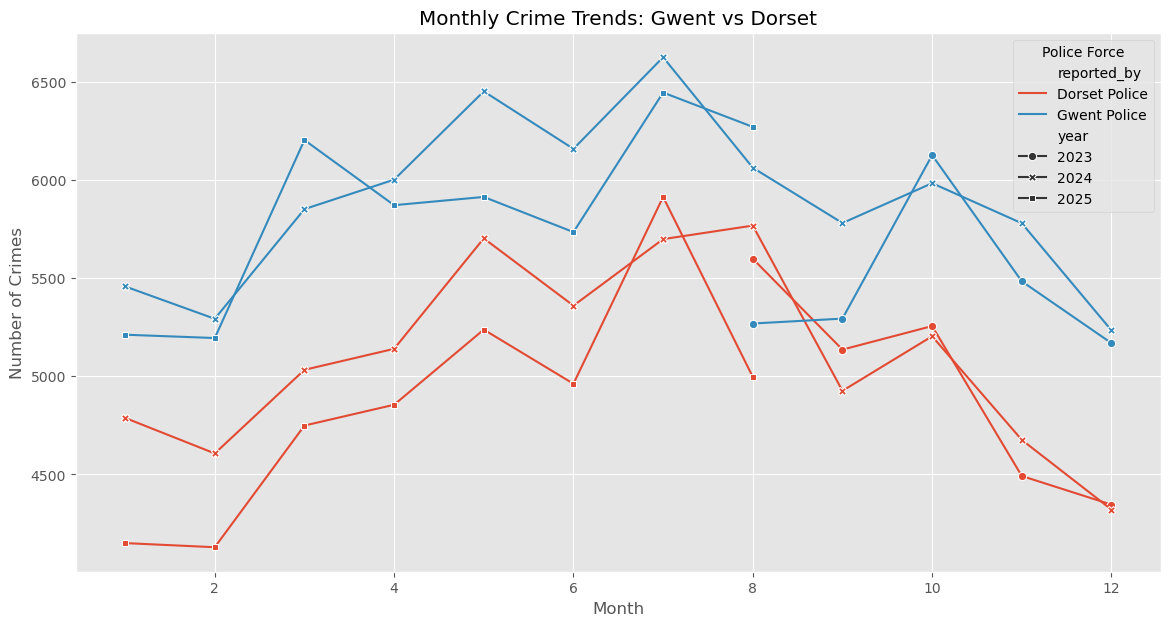

In [28]:
monthly_compare = df_two_forces.groupby(['year', 'month_num', 'reported_by']).size().reset_index(name='counts')

plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_compare, x='month_num', y='counts', hue='reported_by', style='year', markers=True, dashes=False)
plt.title("Monthly Crime Trends: Gwent vs Dorset")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Police Force")
plt.show()

## Insight

Both regions exhibit similar season patterns, with crime levels rising between May and August and dropping more towards winter.

Dorset showed a sharper summer increase, likely being caused by tourism and public gatherings.

Gwent Police maintains a more stable pattern across the year, suggesting conistent but moderate levels of local crime.

For real estate, this implies that dorset season spikes may temporarily impact short-term rental demand and perceived safety, whereas Gwent's steady rate supports a more stable year round living environment.

## Geospatial Comparison - Crime Hotspot

This Folium heatmap is used to visualise the geopgraphic distribution of crimes in both regions

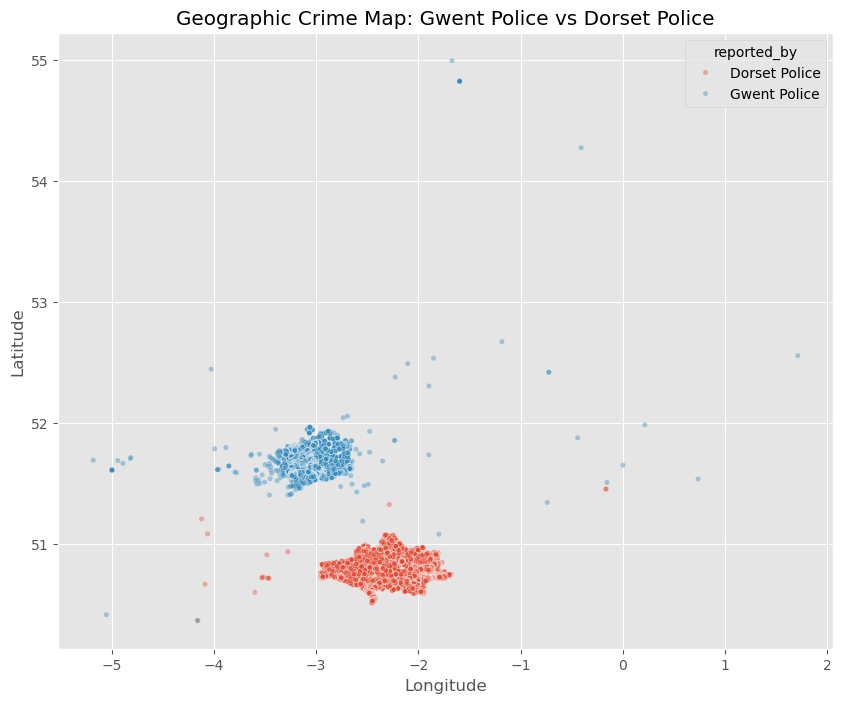

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df_two_forces,
    x='longitude', y='latitude',
    hue='reported_by',
    alpha=0.4,
    s=15
)
plt.title(f"Geographic Crime Map: {force_a} vs {force_b}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Dorset shows dense clusters of crime around Bournemouth and Poole areas, this confirms urban concentation and tourist-driven activity.

Gwent shows a more scattered smaller hotspots, particularly around Newport and Cwmbran, reflecting its mixed suburban layout.

For a real estate perspective, Dorset's urban cores might carry higher crime risks but also greater rental oppurtunities whereas Gwent offers lower-risk investment zones with stead, affordable property growth.

## Top Crime Types per Force

A bar chart was used to visualise each regions most frequent crime categories

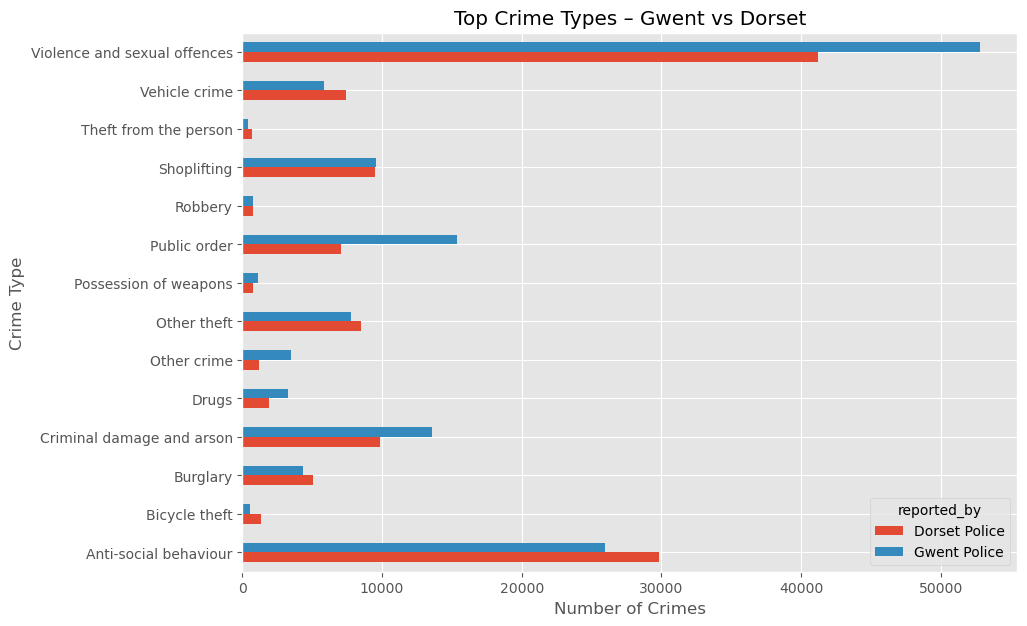

In [32]:
df_two_forces.groupby(['reported_by', 'crime_type']).size().reset_index(name='counts').pivot(
    index='crime_type', columns='reported_by', values='counts').fillna(0).plot(
    kind='barh', figsize=(10,7))
plt.title("Top Crime Types – Gwent vs Dorset")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()

## Insight

Violence and Sexual Offences is the highest crime type across both regions, but in Dorset there is more anti-social behaviour while in Gwent there is more public order.

## Conclusion

This analysis explored how crime patterns vary between four regions but particularly, Gwent and Dorset. The findings showed that while both regions experience similar dominant offences, their spatial and seasonal characteristics differ significantly.

Dorset's urban coastal environment produces higher seasonal crime fluctuations, particularly in theft-related offences linked to tourism and nightlife, whereas in Gwent it demonstrates steady, lower-volume crime levels consistent with smaller surburban communities.

From a real estate perspective, these insights suggest that:

- Dorset carries short-term investmennt potential but comes with higher risk variability.
- Gwent represents a stable, lower-risk market ideal for long term property ownership and consistent rental returns.

The study reinforces the importance of using data analytics in real estate to identify high-risk areas, forecast safety trends and support informed decisions-making for developers, landlords and local authorities.

## Future Work

Future research and analysis could be improved in several ways;

- Doing more in depth analysis
- Doing analysis on outcomes
- Adding real estate valuations
- Integrating socio-econmic Data